# 0. Import packages

[pypi video-indexer](https://pypi.org/project/video-indexer/)

In [1]:
import pandas as pd 
import numpy as np

import requests
from PIL import Image
from io import BytesIO
from video_indexer import VideoIndexer

from matplotlib import pyplot as plt

# 1. Create a VideoIndexer

In [2]:
CONFIG = {
    'SUBSCRIPTION_KEY': '86a8cb566d4c4f3a857679bfdb1d13b1',
    'LOCATION': 'trial',  # trial account shows no location
    'ACCOUNT_ID': '4c2a0fa8-c3b3-4e7c-92ae-b811f0464227'
}

vi = VideoIndexer(
    vi_subscription_key=CONFIG['SUBSCRIPTION_KEY'],
    vi_location=CONFIG['LOCATION'],
    vi_account_id=CONFIG['ACCOUNT_ID']
)

# 2. Analyse video 

## 2.1 Upload video to VideoIndexer from local file system

In [19]:
video_id = vi.upload_to_video_indexer(
   input_filename='../data/digital-video-sample/avkash-boarding-pass.mp4',
   video_name='avkash-boarding-pass',  # identifier for video in Video Indexer platform, must be unique during indexing time
   video_language='English'
)

Uploading video to video indexer...


In [20]:
video_id

'a92689f7a7'

## 2.2 Get analysis result

In [21]:
info = vi.get_video_info(video_id)
info

Getting video info for: a92689f7a7


{'partition': None,
 'description': None,
 'privacyMode': 'Private',
 'state': 'Processed',
 'accountId': '4c2a0fa8-c3b3-4e7c-92ae-b811f0464227',
 'id': 'a92689f7a7',
 'name': 'avkash-boarding-pass',
 'userName': 'ODL_User 198837',
 'created': '2022-06-26T14:54:47.5927862+00:00',
 'isOwned': True,
 'isEditable': True,
 'isBase': True,
 'durationInSeconds': 26,
 'summarizedInsights': {'name': 'avkash-boarding-pass',
  'id': 'a92689f7a7',
  'privacyMode': 'Private',
  'duration': {'time': '0:00:26.499856', 'seconds': 26.5},
  'thumbnailVideoId': 'a92689f7a7',
  'thumbnailId': '7888ec17-6b6f-4374-bab8-3b1d1edb7fb9',
  'faces': [{'videoId': 'a92689f7a7',
    'confidence': 0,
    'description': None,
    'title': None,
    'thumbnailId': '3986ed6e-948e-4d1f-86df-9e584bf6dfab',
    'seenDuration': 26.4,
    'seenDurationRatio': 0.9962,
    'id': 1000,
    'name': 'Unknown #1',
    'appearances': [{'startTime': '0:00:00',
      'endTime': '0:00:26.3666666',
      'startSeconds': 0,
      'end

In [22]:
info["summarizedInsights"]["faces"]

[{'videoId': 'a92689f7a7',
  'confidence': 0,
  'description': None,
  'title': None,
  'thumbnailId': '3986ed6e-948e-4d1f-86df-9e584bf6dfab',
  'seenDuration': 26.4,
  'seenDurationRatio': 0.9962,
  'id': 1000,
  'name': 'Unknown #1',
  'appearances': [{'startTime': '0:00:00',
    'endTime': '0:00:26.3666666',
    'startSeconds': 0,
    'endSeconds': 26.4}]}]

In [23]:
info["videos"][0]["insights"]["faces"]

[{'id': 1000,
  'name': 'Unknown #1',
  'confidence': 0,
  'description': None,
  'thumbnailId': '3986ed6e-948e-4d1f-86df-9e584bf6dfab',
  'title': None,
  'imageUrl': None,
  'thumbnails': [{'id': 'ba5066aa-2200-482a-9b55-b96458cceec0',
    'fileName': 'FaceInstanceThumbnail_ba5066aa-2200-482a-9b55-b96458cceec0.jpg',
    'instances': [{'adjustedStart': '0:00:00',
      'adjustedEnd': '0:00:00.0335195',
      'start': '0:00:00',
      'end': '0:00:00.0335195'}]},
   {'id': '255ee139-2b5f-47d1-98c6-746873880464',
    'fileName': 'FaceInstanceThumbnail_255ee139-2b5f-47d1-98c6-746873880464.jpg',
    'instances': [{'adjustedStart': '0:00:05.0493222',
      'adjustedEnd': '0:00:05.0828417',
      'start': '0:00:05.0493222',
      'end': '0:00:05.0828417'}]},
   {'id': '9ef7f689-7651-4c4a-a2ea-ac0b70b1d52d',
    'fileName': 'FaceInstanceThumbnail_9ef7f689-7651-4c4a-a2ea-ac0b70b1d52d.jpg',
    'instances': [{'adjustedStart': '0:00:10.0527',
      'adjustedEnd': '0:00:10.0862195',
      'start

# 2.3 Extract  thumbnails 

In [24]:
print(f'{len(info["summarizedInsights"]["faces"])} face(s) detected from video {video_id}')

1 face(s) detected from video a92689f7a7


In [25]:
thumbnail_images = []
thumbnail_images_stream = []
for thumbnail in info["videos"][0]["insights"]["faces"][0]["thumbnails"]:
    if "fileName" in thumbnail and "id" in thumbnail:
        filename = thumbnail["fileName"]
        thumb_id = thumbnail["id"]
        img_code = vi.get_thumbnail_from_video_indexer(video_id, thumb_id)
        img_stream = BytesIO(img_code)
        img = Image.open(img_stream)
        thumbnail_images.append(img)
        thumbnail_images_stream.append(img_stream)
        

Getting thumbnail from video: a92689f7a7, thumbnail: ba5066aa-2200-482a-9b55-b96458cceec0
Getting thumbnail from video: a92689f7a7, thumbnail: 255ee139-2b5f-47d1-98c6-746873880464
Getting thumbnail from video: a92689f7a7, thumbnail: 9ef7f689-7651-4c4a-a2ea-ac0b70b1d52d
Getting thumbnail from video: a92689f7a7, thumbnail: 460873c9-1004-4125-a295-805da1cc6566
Getting thumbnail from video: a92689f7a7, thumbnail: 95e0bf8f-02a5-48e5-b302-7cfa636ebac0
Getting thumbnail from video: a92689f7a7, thumbnail: 3986ed6e-948e-4d1f-86df-9e584bf6dfab


{'comment': b'Lavc58.54.100\x00'}
{'comment': b'Lavc58.54.100\x00'}
{'comment': b'Lavc58.54.100\x00'}
{'comment': b'Lavc58.54.100\x00'}
{'comment': b'Lavc58.54.100\x00'}
{'comment': b'Lavc58.54.100\x00'}


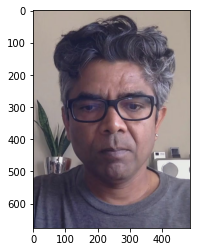

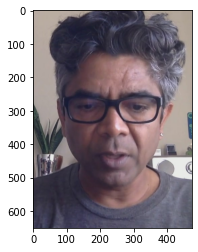

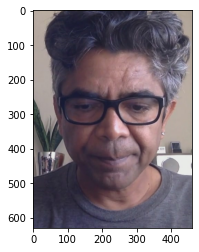

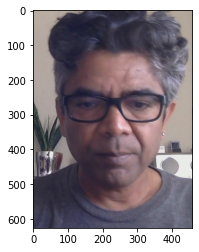

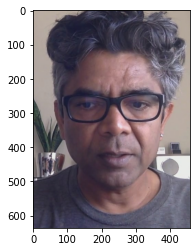

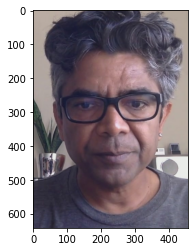

In [14]:
for img in thumbnail_images:
    print(img.info)
    plt.figure()
    plt.imshow(img)

# 3.  Collect face from VideoIndexer

Python SDK tutorial: https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/quickstarts-sdk/identity-client-library?tabs=visual-studio&pivots=programming-language-python

In [ ]:
!pip install --upgrade azure-cognitiveservices-vision-face

In [26]:
from azure.cognitiveservices.vision.face import FaceClient
from azure.cognitiveservices.vision.face.models import TrainingStatusType,Person,QualityForRecognition
from msrest.authentication import CognitiveServicesCredentials

KEY = "64b755b03b904be5b9d41d5a5de09eaa"
ENDPOINT = "https://kioskfaceservices198837.cognitiveservices.azure.com/"

face_client = FaceClient(ENDPOINT, CognitiveServicesCredentials(KEY))
face_client.api_version

'1.0'

In [27]:
import uuid 

PERSON_GROUP_ID   = str(uuid.uuid4())

i = 0
person_group_name = "boarding-passenger-"+str(i) 

In [28]:
def build_person_group(client, person_group_id, person_group_name,thumbnail_images_stream):
    # Create empty Person Group
    client.person_group.create(person_group_id,person_group_id)

    # Create a person group person
    person = client.person_group_person.create(person_group_id, person_group_name)
    for img_stream in thumbnail_images_stream:
        client.person_group_person.add_face_from_stream(img_stream)

    # Train the person group
    client.person_group.train(person_group_id)

    # wait for training to finish
    while(True):
        training_status = client.person_group.get_training_status(person_group_id)
        print("Training status: {}.".format(training_status.status))
        if (training_status.status is TrainingStatusType.succeeded):
            break
        elif (training_status.status is TrainingStatusType.failed):
            client.person_group.delete(person_group_id=PERSON_GROUP_ID)
            sys.exit('Training the person group has failed.')
        time.sleep(5)

In [29]:
build_person_group(face_client, PERSON_GROUP_ID, person_group_name, thumbnail_images_stream)

APIErrorException: (InvalidRequest) Invalid request has been sent.

# 4. Extract emotions

In [30]:
info["summarizedInsights"].keys()

dict_keys(['name', 'id', 'privacyMode', 'duration', 'thumbnailVideoId', 'thumbnailId', 'faces', 'keywords', 'sentiments', 'emotions', 'audioEffects', 'labels', 'framePatterns', 'brands', 'namedLocations', 'namedPeople', 'statistics', 'topics'])

In [33]:
print("Sentiment\tseenDurationRatio")
print("- - "*10)
for sentiment in info["summarizedInsights"]["sentiments"]:
    print(f'{sentiment["sentimentKey"]}  \t{sentiment["seenDurationRatio"]}')

Sentiment	seenDurationRatio
- - - - - - - - - - - - - - - - - - - - 
Neutral  	1
Negative  	0.034


In [34]:
print("Emotion\tseenDurationRatio")
print("- - "*10)
for emotion in info["summarizedInsights"]["emotions"]:
    print(f'{emotion["type"]}  \t{emotion["seenDurationRatio"]}')

Emotion	seenDurationRatio
- - - - - - - - - - - - - - - - - - - - 
Fear  	0.034


# 5. Extract face from Digital ID

In [ ]:
def detect_face_from_url(client,url):
    detect_faces = client.face.detect_with_url(url=url,detection_model='detection_03')
    if not detected_faces:
        raise Exception(f'No face detected from image {url}')        
    print(f'Total face(s) detected: {len(detected_faces)}')
    return detected_faces

def detect_face_from_stream(client,path):
    detect_faces = client.face.detect_with_stream((open(path,"rb"),detection_model='detection_03')
    if not detected_faces:
        raise Exception(f'No face detected from {path}')        
    print(f'Total face(s) detected: {len(detected_faces)}')
    return detected_faces


In [37]:
import io

face_client.face.detect_with_stream(open("../data/digital_id_template/avkash.png","rb"),detection_model='detection_03')

APIErrorException: (InvalidRequest) Invalid request has been sent.